### Convolutional Neural Networks with Cifar10 Dataset

Build a CNN that can classify images into (10) categories

#### Data preprocessing

In [1]:
# Imports
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [2]:
# Class names for dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Just FYI

(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [3]:
# Normalise images - this time, the images are not combined into a single dimension as per ann-2.ipynb + 3rd dimension of RGB
X_train = X_train/255.0
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test = X_test/255.0
X_test.shape

(10000, 32, 32, 3)

#### Test Image Example

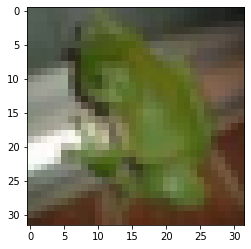

In [5]:
plt.imshow(X_test[7])

#### Define Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

cnn = Sequential()

'''
filters - No. of filters
kernel_size - size of filter (kernel)
padding - same vs. valid
    > same will pad kernel with 0 around edges of image, whereas valid will ignore edges when kernel is not 'filled' with pixels
activation - Activation Function
input_shape
'''
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [7]:
# Adding a second layer
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# Max-pooling layer

# Only keeps the most important/prominent features when striding with the filter to reduce dimensions (complexity) of training data
# i.e. keeps only the most important information

'''
pool_size - size of pooling filter
strides - stride (how many pixels traversed at each step) of kernel
'''
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [8]:
# Third layer
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [9]:
# Fourth layer with a Max-pooling layer
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [10]:
# Flatten layer
cnn.add(Flatten())

# First Dense layer
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.4))

In [11]:
# Output layer
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

#### Training the CNN

In [13]:
cnn.fit(X_train, y_train, epochs=20) # Train for 20 epochs

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 172us/sample - loss: 1.5131 - sparse_categorical_accuracy: 0.4488
Epoch 2/20
50000/50000 [==============================] - 7s 137us/sample - loss: 1.1087 - sparse_categorical_accuracy: 0.6104
Epoch 3/20
50000/50000 [==============================] - 7s 137us/sample - loss: 0.9345 - sparse_categorical_accuracy: 0.6741
Epoch 4/20
50000/50000 [==============================] - 7s 139us/sample - loss: 0.8281 - sparse_categorical_accuracy: 0.7129
Epoch 5/20
50000/50000 [==============================] - 7s 138us/sample - loss: 0.7414 - sparse_categorical_accuracy: 0.7416
Epoch 6/20
50000/50000 [==============================] - 7s 137us/sample - loss: 0.6813 - sparse_categorical_accuracy: 0.7599
Epoch 7/20
50000/50000 [==============================] - 7s 137us/sample - loss: 0.6164 - sparse_categorical_accuracy: 0.7826
Epoch 8/20
50000/50000 [==============================] - 7s 138us/sample - loss: 0.5702

In [14]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy}')

10000/10000 [==============================] - 1s 91us/sample - loss: 1.1017 - sparse_categorical_accuracy: 0.7513
Test accuracy: 0.7512999773025513
